In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
data = pd.read_csv("data\cleaned_data_edited.csv")

## Question 1: Liệu có sự khác biệt lớn nào về hiệu năng của các xe ở các tầm giá khác nhau hay không 
Looking at the prices, we can observe a substantial difference between the prices of various cars. For example, 75% of the cars are priced below 42k EUR, while the remaining 25% reach up to 600k EUR. This is not a data input error but rather a characteristic of the automotive goods market, where there is significant fluctuation among brands and models.

To analyze whether the price differences correspond to significant performance variations, we can employ the following strategies:

- Benefits of the question:
Answering this question helps clarify whether quality aligns with quantity, addressing the crucial balance between affordability and performance. It aids consumers in making informed decisions, ensuring they acquire products that meet their performance requirements while remaining within their budget.
- How to answer the question by using data?
        - **Boxplot Analysis:** Identify "normal" price ranges and outliers with significantly higher prices using boxplots. Evaluate price distribution within different segments to understand data spread.
        - **Technical Specifications Analysis:** Explore key parameters (horsepower, fuel efficiency, acceleration, etc.)and compare them across price ranges. Create radar charts for visual comparison of performance metrics at different price points.
        - **Additional Technical Parameters:** Analyze seating capacity, vehicle type, etc., to understand trends among different car types at distinct price levels.

Firstly, we need to observe the distribution of cars based on price to divide them into appropriate price ranges. We will use a boxplot to visualize the distribution of cars according to their prices.

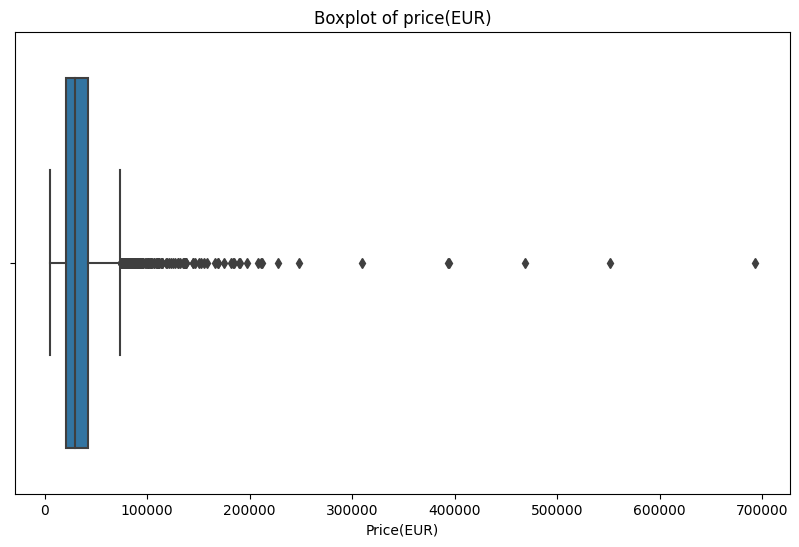

In [3]:
#Vẽ boxplot bằng matplotlib cho cột price(EUR)
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Price(EUR)'])
plt.title('Boxplot of price(EUR)')
plt.show()


From the results above, it is evident that there is a significant difference between the price ranges. We will categorize the data into three subsets:

- Normal price range: 0 - 70k EUR
- Due to substantial outliers, further categorization will be done:
  - High price range: 70k - 150k EUR
  - Very high price range: greater than 150k EUR

In [36]:
# Tạo cột mới Type để phân loại giá tiền
threshold_1 = 70000
threshold_2 = 150000
data['Type'] = 'Normal'
data.loc[(data['Price(EUR)'] > threshold_1 ) & (data['Price(EUR)'] < threshold_2), 'Type'] = 'Expensive'

data.loc[data['Price(EUR)'] >= threshold_2, 'Type'] = 'Very Expensive'


# rút gọn tên cột để dễ nhìn
data = data.rename(columns={
    'Power(kW)': 'Power',
    'Consumption(l/100km or kWh/100km)': 'Consumption',
    'CO2 emissions(g/km)': 'CO2 Emissions',
    'Mileage(km)': 'Mileage',
    'Engine capacity(ccm)': 'Engine Capacity'
})


After categorization, we will begin calculating the average performance of cars within each group and visualize the results on a chart.

In [37]:
from sklearn.preprocessing import MinMaxScaler

# Chọn ra các cột thuộc tính sẽ nhận xét
selected_columns = ['Power', 'Consumption', 'CO2 Emissions', 'Mileage', 'Engine Capacity']

# Tính giá trị trung bình cho mỗi loại xe
average_data = data.groupby('Type')[selected_columns].mean().reset_index()

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
average_data[selected_columns] = scaler.fit_transform(average_data[selected_columns]) + 0.1 # +0.1 để tránh trường hợp giá trị = 0


# Tạo biểu đồ radar
fig = go.Figure()

for i, row in average_data.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[selected_columns].values.tolist(),
        theta=selected_columns,
        fill='toself',
        name=row['Type']
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1.1]
        )),
    showlegend=True
)

fig.show()


Comment:




Next, we will analyze additional parameters to examine the distribution trends of cars within different groups.

In [38]:
columns = ["Seats", "Fuel", "Transmission", "Condition"]

for column in columns:
    # Tạo danh sách các nhóm và các nhãn
    groups = data['Type'].unique()
    labels = data[column].unique()

    # Tạo một biểu đồ cột nhóm
    fig = go.Figure()

    # Vẽ từng cột cho mỗi nhóm
    for i, group in enumerate(groups):
        # Lọc dữ liệu cho mỗi nhóm
        group_data = data[data['Type'] == group]
        
        # Tính toán phần trăm cho mỗi nhãn trong nhóm
        percentages = [group_data[group_data[column] == label].shape[0] / group_data.shape[0] * 100 for label in labels]
        
        # Vẽ cột
        fig.add_trace(go.Bar(
            x=labels, 
            y=percentages, 
            name=str(group),
        ))

    # Đặt nhãn cho các trục và biểu đồ
    fig.update_layout(barmode='group', xaxis_title=column, yaxis_title='Percentage (%)', title=f'Group Bar Chart for {column}')

    # Hiển thị biểu đồ
    fig.show()
